In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
df_train = pd.DataFrame(train_data)
df_targets = pd.DataFrame(train_targets)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
df_targets.head()

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [7]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
df_targets.describe()

,0
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


In [9]:
print(np.min(train_data, axis=0))  #result for each feature individually
print(np.mean(train_data, axis=0))
print(np.std(train_data, axis=0)) 
print(np.max(train_data, axis=0)) 

[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


We have different scale values so we need to normalize all columns but not with the maximun value. We have to do this for each column otherwise....


In [10]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean   #zero centered
std = train_data.std(axis=0)
train_data/=std   #zero centerness and makes the numbers small

test_data -= mean
test_data /= std

#in this way the scale are more comparable because the values are much more close to each 
#other
#To prevent information leak 

# K-Fold Cross Validation
Splitting the data in different train ad tests

In [11]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1)) #it's a linear activation
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae']) #the optimizer uses the loss to optimize
    return model

test_model = build_model()
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [97]:
k = 4
num_val_samples = len(train_data)//k  #we have to make sure that the result is int
num_epochs = 100 # TODO: change to 100 later
all_scores=[]  #we need to collect all the scores (errors) to decide which one to use
all_histories=[]
all_models=[]

for i in range(k):
    print('Fold:',str(i+1))
    
    val_data = train_data[i* num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i* num_val_samples:(i+1)*num_val_samples]
    
    train_data_left = train_data[0:i* num_val_samples]
    train_data_right = train_data[(i+1)*num_val_samples:]
    partial_train_data = np.concatenate([train_data_left,train_data_right],axis=0)
    
    train_targets_left = train_targets[0:i* num_val_samples]
    train_targets_right = train_targets[(i+1)*num_val_samples:]
    partial_train_targets = np.concatenate([train_targets_left,train_targets_right],axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,
              batch_size=1,verbose=0,validation_data=(val_data,val_targets))  #verbose=1
    model.save(str(i+1)+'_model.h5')  #h5 is a protocol to save data 
    val_mse, val_mae = model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)
    all_histories.append(history)
    all_models.append(model)

Fold: 1
101/101 [==============================] - 0s 50us/step
Fold: 2
101/101 [==============================] - 0s 49us/step
Fold: 3
101/101 [==============================] - 0s 48us/step
Fold: 4
101/101 [==============================] - 0s 48us/step


In [98]:
print(all_scores)

[1.843161951197256, 2.1814705806203407, 2.561716039582054, 2.313986676754338]


In [99]:
all_histories

In [100]:
all_models

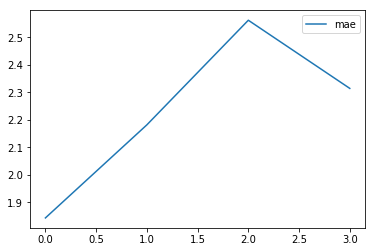

In [101]:
plt.plot(all_scores,label='mae')
plt.legend()
plt.show()
plt.close()

In [102]:
len(all_histories)

4

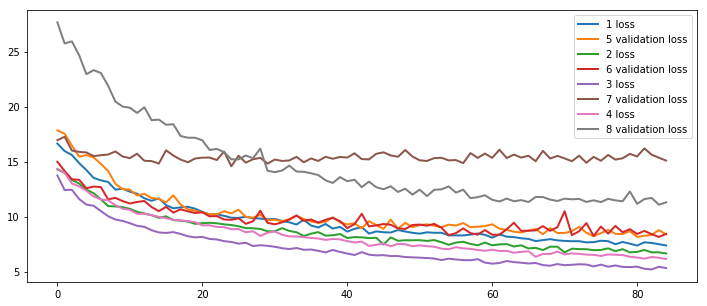

In [131]:
plt.figure(figsize=(12,5))
for i,item in enumerate(all_histories):
    i +=1
    plt.plot(item.history['loss'][15:],label='%s loss' % i,linewidth=2)
    i+=4
    plt.plot(item.history['val_loss'][15:],label='%s validation loss' % i,linewidth=2)
plt.legend()
plt.show()

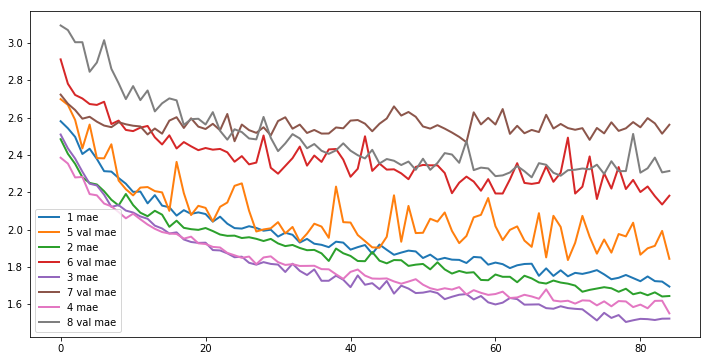

In [134]:
plt.figure(figsize=(12,6))
for i,item in enumerate(all_histories):
    i +=1
    plt.plot(item.history['mean_absolute_error'][15:],label='%s mae' % i,linewidth=2)
    i+=4
    plt.plot(item.history['val_mean_absolute_error'][15:],label='%s val mae' % i,linewidth=2)
plt.legend()
plt.show()

In [ ]:
print(np.min(train_data, axis=0))  #result for each feature individually
print(np.mean(train_data, axis=0))
print(np.std(train_data, axis=0)) 
print(np.max(train_data, axis=0)) 

In [ ]:
#Study library keras.fit and all the operations that you can do with  your data

In [113]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [136]:
model = models.load_model('1_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict()